#  EJERCICIOS

### EJERCICIO 1.
Tenemos un tarro con 20 bolas de colores rojo y negro que tienen inscrito un
número. Vas a usarlo para calcular probabilidades y probabilidades condicionadas cuando
sacamos una de las bolas son mirar, al azar. Calcula:

 a) P(roja): <span style="color:green;">0.4</span><br>

 b) P(negra) sin necesidad de contar las negras que hay.<span style="color:green;">0.6</span><br>

 c) P(par)<span style="color:green;">0.65</span><br>

 d) P(roja y par)<span style="color:green;">0.3</span><br>

 e) P(< 20)<span style="color:green;">1</span><br>

 f) P(roja / par)<span style="color:green;">0.462</span><br>

 g) P(par/roja) calculada de dos formas diferentes<span style="color:green;">0.75</span><br>

 Para facilitar los cálculos puedes usar una tabla de contingencia
que da acceso a todos los contadores de forma resumida:


<img src="img/captura1.png" alt="captura1">

### EJERCICIO 2.
El 55.26% de los automóviles de un estacionamiento son de 4 puertas. Los
automóviles de color blanco son el 21.27% del total y los automóviles de 4 puertas escogidos de
entre los blancos son el 59.77%. Determina el porcentaje de coches blancos escogidos de entre
los de 4 puertas.

 A = 4 puertas

 B = blanco

 ¿P(B / A)? <span style="color:green">0.2299</span>

Solución: Sea
A = Porcentaje de 4 puertas = 55.26% = 0.5526

B = Porcentaje de blancos = 21.27% = 0.2127

A/B = Porcentaje de 4 puertas que son blancos = 59.77% = 0.5977

El porcentaje deseado es: P (blancos que son de 4 puertas), lo cual puede obtenerse aplicando la
fórmula de Bayes para probabilidades condicionales.

P(B / A) =  P(B ∩ A)/P(A)  =  P(A / B) P(B) / P(A)



### EJERCICIO 3.
Una empresa de tecnología tiene 3 departamentos:  Desarrollo (D), Marketing (M)
y Ventas (V). La empresa tiene en la actualidad 100 empleados que se reparten de la siguiente
manera: 50 trabajan en desarrollo, 30 en marketing y 20 en ventas.

Se sabe que la probabilidad de que un empleado reciba un aumento de sueldo no es igual en todos
los departamentos:

• P(aumento / D) = 0.6

• P(aumento / M) = 0.4

• P(aumento / V) = 0.2

¿Cuál es la probabilidad total de que un empleado seleccionado al azar reciba un aumento?

<span style="color:green;">0.46</span><br>

Nota: Utiliza la regla de la cadena para calcular la probabilidad total:
P(A) = P(A/B1) P(B1) + P(A / B2) P(B2) + …. + P(A/Bn) P(Bn)


### EJERCICIO 4:
El EJEMPLO 3 quizás tenga aun error de cálculo. Te propongo que hagas un
programa en Python que realice los cálculos.

In [9]:
# Datos
departamentos = {
    "Desarrollo": {"p_depto": 50/100, "p_aumento": 0.6},
    "Marketing":  {"p_depto": 30/100, "p_aumento": 0.4},
    "Ventas":     {"p_depto": 20/100, "p_aumento": 0.2}
}

# Cálculo de la probabilidad total de aumento
prob_total_aumento = 0

for depto, datos in departamentos.items():
    contribucion = datos["p_depto"] * datos["p_aumento"]
    print(f"{depto}: P(depto) * P(aumento | depto) = {datos['p_depto']} * {datos['p_aumento']} = {contribucion}")
    prob_total_aumento += contribucion

print(f"\nProbabilidad total de aumento: {prob_total_aumento:.4f} ({prob_total_aumento * 100:.2f}%)")


Desarrollo: P(depto) * P(aumento | depto) = 0.5 * 0.6 = 0.3
Marketing: P(depto) * P(aumento | depto) = 0.3 * 0.4 = 0.12
Ventas: P(depto) * P(aumento | depto) = 0.2 * 0.2 = 0.04000000000000001

Probabilidad total de aumento: 0.4600 (46.00%)


### EJERCICIO 5.
Calcula la probabilidad de que en el EJEMPLO 5, el correo con las palabras “lunch money money” sea spam o normal:

 a) Justo antes de añadir el contador extra (enlace: cuando hay 8 correos normales con 17
palabras en normal y 4 correos spam con 7 palabras en spam)

<span style="color:green">Antes del suavizado: no se puede decidir, porque ambos resultados son cero (por ausencia de palabra).</span>

 b) Justo después de añadir un contador fijo para evitar el cero a cada palabra.

<span style="color:green">Después del suavizado: el modelo sí puede tomar una decisión, y probablemente clasificará el correo como spam, ya que la palabra "money" aparece más en spam.</span>

### EJERCICIO 6:
Usando los datos del ejercicio anterior, entrena un modelo Bayesiano creado con
scikit-learn. Y predice lo mismo que en el ejemplo3.

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# 1. Dataset simulado
correos = [
    "hi lunch tomorrow",        # normal
    "meeting schedule update",  # normal
    "lunch at noon",            # normal
    "free money offer",         # spam
    "earn money now",           # spam
    "money money money",        # spam
    "important lunch plans",    # normal
    "project delivery date",    # normal
    "cheap loans now",          # spam
    "office lunch plans",       # normal
    "marketing meeting recap",  # normal
    "win cash prizes",          # spam
]

# Etiquetas: 0 = normal, 1 = spam
etiquetas = [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1]

# 2. Vectorizador de texto
vectorizador = CountVectorizer()
X = vectorizador.fit_transform(correos)

# 3. Modelo bayesiano
modelo = MultinomialNB()
modelo.fit(X, etiquetas)

# 4. Predicción sobre el correo: "lunch money money"
correo_test = ["lunch money money"]
X_test = vectorizador.transform(correo_test)

prediccion = modelo.predict(X_test)
proba = modelo.predict_proba(X_test)

# 5. Resultados
clase = "SPAM" if prediccion[0] == 1 else "NORMAL"
print(f"Predicción para '{correo_test[0]}': {clase}")
print(f"Probabilidades: NORMAL = {proba[0][0]:.4f}, SPAM = {proba[0][1]:.4f}")


Predicción para 'lunch money money': SPAM
Probabilidades: NORMAL = 0.1143, SPAM = 0.8857


### EJERCICIO 7.
Entrena un modelo Bayesiano para los datos del EJEMPLO 4 y predice el mismo caso que en el ejemplo.

In [11]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1. Datos simulados (departamento y si tuvo aumento o no)
departamentos = ['Desarrollo'] * 50 + ['Marketing'] * 30 + ['Ventas'] * 20
aumentos = [1]*30 + [0]*20 + [1]*12 + [0]*18 + [1]*4 + [0]*16  # 1 = sí, 0 = no

# 2. Codificamos texto a números
le = LabelEncoder()
X = le.fit_transform(departamentos).reshape(-1, 1)  # reshape porque es una sola feature
y = np.array(aumentos)

# 3. Entrenamos el modelo
modelo = CategoricalNB()
modelo.fit(X, y)

# 4. Predicción: ¿Un empleado de Desarrollo recibirá aumento?
depto_test = le.transform(["Desarrollo"]).reshape(-1, 1)
prediccion = modelo.predict(depto_test)
proba = modelo.predict_proba(depto_test)

# 5. Resultado
print(f"Departamento: Desarrollo")
print(f"Predicción: {'Aumento' if prediccion[0] == 1 else 'No aumento'}")
print(f"Probabilidades -> No Aumento: {proba[0][0]:.2f}, Aumento: {proba[0][1]:.2f}")


Departamento: Desarrollo
Predicción: Aumento
Probabilidades -> No Aumento: 0.41, Aumento: 0.59


### EJERCICIO 8.
Vamos a clasificar frases en dos categorías: Deportivas y tecnológicas. Copia el
siguiente código:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# 1. Dataset: frases deportivas y tecnológicas
frases = [
    "El equipo ganó el partido",
    "El jugador marcó un gol",
    "La liga empieza en septiembre",
    "Contrataron a un nuevo entrenador",
    "Se juega la final el domingo",
    "Apple lanza un nuevo iPhone",
    "Actualización del sistema operativo",
    "La inteligencia artificial avanza",
    "El procesador es más rápido",
    "Nueva tecnología en pantallas OLED"
]

# 2. Etiquetas: 0 = deportiva, 1 = tecnológica
etiquetas = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

# 3. Crear y entrenar el modelo
modelo = make_pipeline(CountVectorizer(), MultinomialNB())
modelo.fit(frases, etiquetas)

# 4. Frases de prueba
pruebas = [
    "El jugador usó una nueva tecnología",
    "La pantalla del móvil es muy nítida",
    "El equipo celebra su victoria",
    "Avances en inteligencia artificial aplicada al deporte"
]

# 5. Predicción
predicciones = modelo.predict(pruebas)

# 6. Mostrar resultados
for frase, pred in zip(pruebas, predicciones):
    categoria = "Tecnológica" if pred == 1 else "Deportiva"
    print(f"'{frase}' → {categoria}")


'El jugador usó una nueva tecnología' → Deportiva
'La pantalla del móvil es muy nítida' → Tecnológica
'El equipo celebra su victoria' → Deportiva
'Avances en inteligencia artificial aplicada al deporte' → Tecnológica


 a) ¿Por qué usamos MultinomialNB y no GaussianNB?

<span style="color:green">Porque estamos trabajando con texto convertido en conteos de palabras, no con variables numéricas continuas.</span>

 b) Modifica el código para usar tu semilla aleatoria y añade código al final de manera
pregunte repetidamente por una frase hasta que la frase esté vacía y haga la predicción
de a qué clase pertenece (deporte o tecnología) mostrando las probabilidades calculadas.


In [13]:
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import numpy as np

# Semilla fija para reproducibilidad
random.seed(675)
np.random.seed(675)

# Dataset
frases = [
    "El equipo ganó el partido",
    "El jugador marcó un gol",
    "La liga empieza en septiembre",
    "Contrataron a un nuevo entrenador",
    "Se juega la final el domingo",
    "Apple lanza un nuevo iPhone",
    "Actualización del sistema operativo",
    "La inteligencia artificial avanza",
    "El procesador es más rápido",
    "Nueva tecnología en pantallas OLED"
]

etiquetas = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = deportiva, 1 = tecnológica

# Entrenamos modelo
modelo = make_pipeline(CountVectorizer(), MultinomialNB())
modelo.fit(frases, etiquetas)

# Bucle interactivo
print("\nClasificador de frases: DEPORTES (0) o TECNOLOGÍA (1)")
print("Escribe una frase (deja vacío y pulsa Enter para salir):\n")

while True:
    entrada = input("Frase: ").strip()
    if entrada == "":
        print("¡Hasta luego!")
        break

    pred = modelo.predict([entrada])[0]
    proba = modelo.predict_proba([entrada])[0]

    clase = "Tecnológica" if pred == 1 else "Deportiva"
    print(f"➡Clasificación: {clase}")
    print(f"Probabilidades -> Deportiva: {proba[0]:.4f}, Tecnológica: {proba[1]:.4f}\n")



Clasificador de frases: DEPORTES (0) o TECNOLOGÍA (1)
Escribe una frase (deja vacío y pulsa Enter para salir):

➡Clasificación: Deportiva
Probabilidades -> Deportiva: 0.5000, Tecnológica: 0.5000

¡Hasta luego!


### EJERCICIO 9:
Copia el siguiente código que define 100 muestras de peso y altura de 5 hombres
y 50 mujeres, luego implementa y entrena un clasificador de tipo GaussianNB (naïve Bayes
gausiano), lo valida y dibuja los datos usados y lo testea mostrando su desempeño.


In [14]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Definir los datos

textos = [
    "El equipo ganó el partido", "Gran jugada en la final de fútbol",
    "El nuevo teléfono tiene una gran cámara", "Apple lanza una nueva actualización",
    "El tenista venció a su rival", "Los procesadores Intel ahora son más rápidos",
    "ram y cpu son elementos básicos del computador", "Un sistema operativo muy exigente de recursos",
    "la selección nacional de fútbol ha jugado un buen partido", "han batido el record del mundo",
    "los partidos de la nba y la acb me gustan", "las gui necesitan una cpu potente"
]

clases = ["deporte", "tecnología"]
etiquetas = [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1] # 0 = deporte, 1 = tecnología

# Preproceso
vectorizador = TfidfVectorizer()

X = vectorizador.fit_transform(textos) # Convertir textos en matriz de características
X_train, X_test, y_train, y_test = train_test_split(X, etiquetas, test_size=0.2, random_state=675)

# Entrenar y validar modelo
modelo = MultinomialNB()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.3333333333333333


Precisión del modelo: 1.0


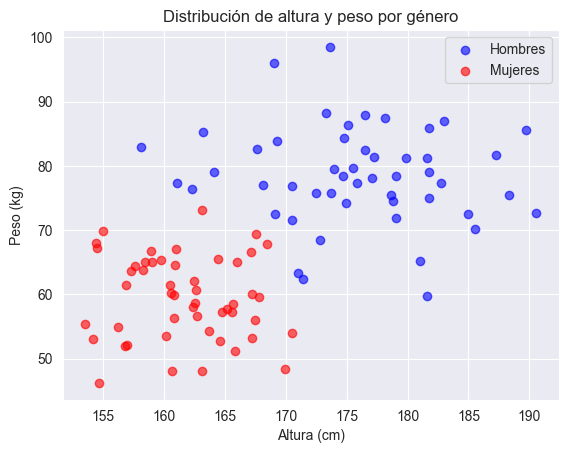

In [15]:
np.random.seed(675) # Personaliza la semilla del generador aleatorio

# Generamos datos: altura (cm) peso (kg) de 50 hombres (clase 0) y mujeres (clase 1)
altura_hombres = np.random.normal(loc=175, scale=6, size=50)
peso_hombres = np.random.normal(loc=78, scale=8, size=50)
altura_mujeres = np.random.normal(loc=162, scale=5, size=50)
peso_mujeres = np.random.normal(loc=60, scale=6, size=50)

X = np.vstack((np.column_stack((altura_hombres, peso_hombres)),
               np.column_stack((altura_mujeres, peso_mujeres))))
y = np.array([0] * 50 + [1] * 50) # 0 Hombre, 1 Mujer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=675)

# Entrenar y validar el modelo
modelo = GaussianNB()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo:", accuracy)

plt.scatter(altura_hombres, peso_hombres, label="Hombres", color="blue", alpha=0.6)
plt.scatter(altura_mujeres, peso_mujeres, label="Mujeres", color="red", alpha=0.6)
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")
plt.legend()
plt.title("Distribución de altura y peso por género")
plt.show() # Añadido para mostrar la gráfica

a) Modifica el código y personaliza los procesos aleatorios con tu semilla aleatoria (líneas 7 y
16). Luego añade código para que pregunte repetidamente (hasta que se indique un peso 0) un
peso y una altura e indique si corresponden a un hombre o a una mujer.


b) ¿Porqué hemos escogido el GaussianNB en vez de por ejemplo el el MultinomialNB?

<span style="color:green">Usamos GaussianNB porque altura y peso son variables continuas y GaussianNB modela cada característica con una distribución normal (gaussiana), lo que lo hace ideal para este tipo de datos.</span>

 ### EJERCICIO 10.
 Responde a estas cuestiones sobre las máquinas de vector soporte.

 c1. ¿La idea fundamental en que se basa las Support Vector Machines?
 <span style="color:green;">La idea fundamental de las Support Vector Machines (SVM) es encontrar un hiperplano en un espacio de alta dimensión que separe las clases de manera óptima, de tal manera que maximice la distancia entre el hiperplano y los puntos más cercanos de cada clase, llamados vectores soporte. El objetivo es crear un modelo de clasificación que generalice bien a nuevos datos.</span><br>

 c2. ¿Qué es un vector soporte?

<span style="color:green;">Un vector soporte es un punto en el conjunto de datos que está más cercano al hiperplano de separación. Estos puntos son cruciales porque son los que definen el margen de separación, es decir, la distancia máxima entre las clases. Si eliminamos un vector soporte, el hiperplano de separación podría cambiar, lo que afecta al modelo.</span><br>

 c3. ¿Porqué es importante escalar las entradas al usar SVM?

<span style="color:green;">Es importante escalar las entradas porque las SVM se basan en la distancia entre los puntos de datos, y si las características tienen escalas diferentes, las distancias pueden verse distorsionadas. Esto puede hacer que el clasificador no encuentre el hiperplano óptimo. Al escalar las características (normalizarlas o estandarizarlas), todas las características tienen la misma importancia y contribuyen de manera equitativa al modelo.</span><br>


 c4. ¿Un clasificador SVM puede devolver un score de confidencia cuando clasifica una
instancia? ¿Y una probabilidad?

<span style="color:green;">Un clasificador SVM no devuelve un score de confianza directo como tal. Sin embargo, puede devolver un valor que representa la distancia al hiperplano de separación, lo que puede interpretarse como un score de confianza. Para obtener probabilidades, es necesario usar una técnica adicional como la "regresión logística" sobre el margen de separación (esto se puede hacer en SVM usando el parámetro probability=True en scikit-learn). Esto permite obtener probabilidades a partir de la distancia del margen, pero no es la salida directa de una SVM.</span><br>


 c5. ¿Deberías usar la versión única o la dual de una SVM para entrenar un modelo con
millones de instancias y miles de características? ¿Cuál sería el modelo a elegir en scikit?

<span style="color:green;">Cuando tenemos un gran número de instancias, la versión dual suele ser más eficiente, ya que involucra la matriz de gram o el producto interno entre los vectores de características, lo que suele ser más manejable. En cuanto al número de características, la versión dual se enfoca en las relaciones entre los puntos, lo que la hace más eficiente en escenarios de alta dimensionalidad. En scikit-learn, el modelo que puedes usar sería SVC(kernel='linear') o SVC(kernel='rbf'), dependiendo del tipo de kernel que quieras emplear.</span><br>

 c6. Imagina que entrenas un clasificador SVM con kernel RBF. Compruebas que tiene
underfitting con el set train ¿Debes incrementar o decrementar γ (gamma)? ¿Y C?

<span style="color:green;">Si el modelo tiene underfitting, eso significa que no está capturando bien la complejidad de los datos. Para mejorar esto:

- γ (gamma): Debes incrementar γ, ya que un valor pequeño de γ puede hacer que el modelo sea muy simple, mientras que un valor más alto puede permitirle capturar más complejidad.

- C: Debes incrementar C, ya que un valor pequeño de C puede hacer que el clasificador sea más flexible pero también puede provocar underfitting, mientras que un valor más grande de C penaliza más los errores y permite un modelo más complejo que puede ajustar mejor los datos.</span><br>

 ### EJERCICIO 11:
 ejecuta el código del ejemplo 20 e indica la consecuencia de:

 a) Subir de valor el parámetro gamma del detector de outliers.

 <span style="color:green;"></span><br>

 b) Bajar el valor del parámetro gamma del detector de outliers.

 <span style="color:green;"></span><br>


### EJERCICIO 12:
Usa el enlace del ejemplo que compara las clases linear.SGDOneClassSVM y
svm.OneClassSVM  y usando uno de los métodos más sencillos de detección de outliers que vimos
en la unidad 1, analiza los resultados y saca conclusiones de cada método.

### EJERCICIO 13:
Copia el siguiente código que define unos datos para realizar clasificaciones en
2 clases y crea, entrena y valida un clasificador de tipo SVC.

In [17]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
# Generar datos(2 clases)
X, y = make_classification(n_samples=300, n_features=2, n_classes=2,
                           n_clusters_per_class=1, n_redundant=0, random_state=449)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=449)

# Entrenar un SVM con underfitting (C bajo, gamma bajo)
svm_under = SVC(kernel='rbf', C=0.1, gamma=0.01)
svm_under.fit(X_train, y_train)

# Predecir y evaluar
train_acc_under = accuracy_score(y_train, svm_under.predict(X_train))
test_acc_under = accuracy_score(y_test, svm_under.predict(X_test))

print(f"SVM Underfitting - Accuracy Train: {train_acc_under:.3f}, Test: {test_acc_under:.3f}")

SVM Underfitting - Accuracy Train: 0.900, Test: 0.878


a) Modifica el código y personaliza la semilla de procesos aleatorios (líneaas 10 y 11). Lo
ejecutas y muestra el accuracy que se consigue en train y test e indica el % de underfitting que
tienes: (score_train - score_test) / score_train * 100


 b) Añade esta función que colorea y dibuja las fronteras de decisión y representa los datos de
entrenamiento y destaca los vectores soporte.

In [18]:
def plot_frontera_decision(modelo, X, y):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                         np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
    Z = modelo.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar frontera de decisión, datos y vectores soporte
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.3, colors=['blue', 'black', 'red'])
    plt.contour(xx, yy, Z, levels=[-1], colors='red', linestyles='dashed')
    plt.contour(xx, yy, Z, levels=[1], colors='blue', linestyles='dashed')

    X_0 = X[y == 0]
    X_1 = X[y == 1]

    plt.scatter(X_0[:, 0], X_0[:, 1], color='green', edgecolors='k', label='Clase 0')
    plt.scatter(X_1[:, 0], X_1[:, 1], color='red', edgecolors='k', label='Clase 1')
    plt.scatter(modelo.support_vectors_[:, 0], modelo.support_vectors_[:, 1],
                s=100, facecolors='none', edgecolors='k', linewidths=1.1, label="Vectores Soporte")

    plt.legend()
    titulo = f"SVC (C={modelo.C}, gamma={modelo.gamma})"
    plt.title(titulo)
    plt.show()

c) Ahora en una nueva celda del notebook crea y entrena con los mismos datos un nuevo SVC
cambiando el valor de los hiperparámetros C y gamma que consigan bajar el porcentaje de
underfitting por debajo del 2%. Muestra el gráfico y los valores de accuracy como en el caso
anterior que se realizaría:

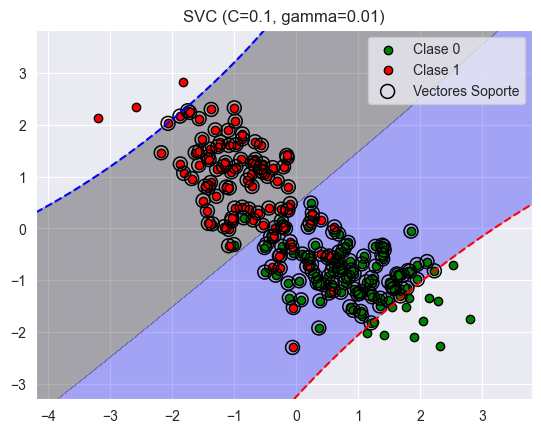

In [19]:
plot_frontera_decision(svm_under, X_train, y_train)

 ### EJERCICIO 14.
 Responde a estas preguntas sobre los árboles de decisión.

 1. ¿Cuál podría ser aproximadamente la profundidad de un árbol de decisión entrenado sin
restricciones usando un conjunto de entrenamiento de un millón de muestras?

<span style="color:green;">Aproximadamente log₂(n), donde n es el número de muestras.</span><br>

 2. Un nodo cuando se utiliza Gini como criterio de división su nivel de impureza es
normalmente más bajo o más alto que sus nodos antecesores? ¿normalmente o siempre?

<span style="color:green;">Normalmente más bajo (pero no siempre).</span><br>

 3. Si un árbol de decisión tiene overfitting ¿es buena idea decrementar max_depth?

<span style="color:green;">Si</span><br>

 4. Un árbol de decisión tiene underfitting ¿Es buena solución escalar características?

<span style="color:green;">No</span><br>

 5. Si tardamos una hora en entrenar un árbol de decisión en un conjunto de datos de
entrenamiento con 1 millón de muestras, ¿Cuánto tardemos aproximadamente en entrenar
otro con un dataset de 100 millones de instancias?

<span style="color:green;">Depende del algoritmo, pero el tiempo de entrenamiento suele crecer más que linealmente, especialmente si no se usan métodos optimizados.</span><br>

 6. Si entrenas un árbol con 100 mil instancias ¿Aumentas la velocidad si indicas
presort=True durante el entrenamiento?

<span style="color:green;"> No necesariamente.</span><br>

 ### EJERCICIO 15.
 Tienes este conjunto de datos y un algoritmo de aprendizaje ID3 (utiliza la entropía como métrica) va a construir un árbol de decisión.

a) Consulta el algoritmo en el enlace y haz los cálculos necesarios a mano para averiguar cuál es la primera pregunta o la primera prueba que se aplicará en el nodo raíz del árbol (la mejor división). Usa este algoritmo
y haz los cálculos a mano.

<span style="color:green;"></span><br>

b) Crea un programa en python que implemente estos pasos.


In [ ]:
import math
from collections import Counter

def entropy(data):
    labels = [row[-1] for row in data]
    total = len(labels)
    counts = Counter(labels)
    return -sum((count/total) * math.log2(count/total) for count in counts.values())

def information_gain(data, attribute_index):
    total_entropy = entropy(data)
    values = set(row[attribute_index] for row in data)
    weighted_entropy = 0
    total = len(data)

    for val in values:
        subset = [row for row in data if row[attribute_index] == val]
        weighted_entropy += (len(subset)/total) * entropy(subset)

    return total_entropy - weighted_entropy

def best_attribute(data):
    num_attributes = len(data[0]) - 1
    gains = [information_gain(data, i) for i in range(num_attributes)]
    return gains.index(max(gains))


c) Crea otro programa que use scikit a ver si obtiene resultados similares.

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Asumiendo que tienes tus datos ya en X (features) y y (target)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y)

# Visualizar árbol
print(export_text(clf, feature_names=feature_names))



d) ¿ID3 sirve para hacer regresiones?

<span style="color:green;">No. ID3 solo sirve para clasificación.</span><br>

### EJERCICIO 16.

En un árbol CART (utiliza Gini como métrica de impureza) se estudia dividir
por dos criterios que generan las divisiones en clases que se ven en la figura:

a) Calcula la impureza que obtendrías si divides por la pregunta “Buena circulación?”

b) Calcula la impureza si preguntas por “Arterias bloqueadas?”.

c) Indica qué pregunta escogería, es decir, cuál sería la mejor división

### EJERCICIO 17:
En el ejercicio 24, ¿porque ponemos el parámetro propability=true en el constructor del clasificador SVC que se utiliza en el método ensamblaje voting_cla?


### EJERCICIO 18:
EJEMPLO DE MODELO HMM MULTINOMIAL. Un modelo con distribución categórica generan salidas (como el lanzamiento de un dado) con n_features posibles valores, es decir, son una generalización de la distribución de probabilidad de Bernoulli porque hay n_features categorías en vez de dos posibles resultados: éxito/fallo. Un HMM categórico tiene probabilidades de emisión para cada componente parametrizado por distribuciones Categóricas.

Un modelo Multinomial genera n_trials tiradas independientes de un dado, cada una con
n_features posibles valores, es decir:

 • Cuando n_trials = 1 y n_features = 2, es como una distribución de Bernoulli.

 • Cuando n_trials > 1 y n_features = 2, es una distribución Binomial.

 • Cuando n_trials = 1 y n_features > 2, es una distribución Categórica.

 Las probabilidades de emisión de cada componente de un HMM Multinomial está parametrizado
por distribuciones Multinomiales.

 Sospechamos que un casino está intercambiando un dado (uno o dos dados) por un dado trucado.
Queremos averiguar:

 1) Cuándo se utiliza el dado trucado (es decir, la ruta más probable)

 2) Con qué frecuencia se utiliza el dado trucado (es decir, probabilidades de transición) y

 3) Probabilidades de cada resultado en una tirada (es decir, probabilidades de emisión).


In [ ]:
# Cargamos librerías
from hmmlearn import hmm

# Hacemos modelo generativo con 2 componentes; dado legal + dado trucado
gen_modelo = hmm.CategoricalHMM(n_components=2, random_state=449) # Personaliza tu semilla

# El primer estado es el dado legal así que comenzamos siempre con él
gen_modelo.startprob_ = np.array([1.0, 0.0])

# Ahora usamos el dado trucado:
# - Tenemos un 95 % de posibilidades de seguir usando el dado Ok y un 5 %
#   de posibilidades de cambiar al dado trucado
# - Cuando entramos en el estado del dado trucado, tenemos un 90 % de
#   posibilidades de permanecer en ese estado y un 10 % de posibilidades de salir
gen_modelo.transmat_ = np.array([[0.95, 0.05],
                              [0.1, 0.9]])

# El primer estado (fila 0) es del dado legal: probabilidades típicas de un dado.
# El segundo (dado trucado) y está sesgado hacia el 6 (lo peor en el juego)
gen_modelo.emissionprob_ = np.array([[1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
                                  [1/10, 1/10, 1/10, 1/10, 1/10, 1/2]])

# simulamos 30 mil tiradas
tiradas, gen_estados = gen_modelo.sample(30000)

In [ ]:
# Dibujamos los estados a lo largo del tiempo
fig, ax = plt.subplots()

ax.plot(gen_estados[:500])

ax.set_title('Estados sobre tiempo')
ax.set_xlabel('Tiempo (# de tiradas)')
ax.set_ylabel('Estado')

plt.show()

In [ ]:
# Dibujamos tiradas del dado ok y del trucado
fig, ax = plt.subplots()

ax.hist(tiradas[gen_estados == 0], label='legal', alpha=0.5, bins=np.arange(7) - 0.5, density=True)

ax.hist(tiradas[gen_estados == 1], label='trucado', alpha=0.5, bins=np.arange(7) - 0.5, density=True)

ax.set_title('Probabilidades de tirada por estado')
ax.set_xlabel('Contador')
ax.set_ylabel('Tirada')
ax.legend()

plt.show()

Ahora, vamos a volver a recalcular los estados ocultos, la matriz de transición y la matriz de
emisión entrenando un nuevo modelo con las observaciones generadas con nuestro sintético que
intentaba reproducir el escenario del casino. Copia el código y personaliza las semillas aleatorias
(línea 9).

In [ ]:
# Dividimos datos en train y test (50/50)
X_train = tiradas[:tiradas.shape[0] // 2]
X_test = tiradas[tiradas.shape[0] // 2:]

# Buscar un modelo con score óptimo
gen_score = gen_modelo.score(X_test)
mejor_score = None
mejor_modelo = None

n_entrenamientos = 50
np.random.seed(449) # Personaliza la semilla aleatoria

for idx in range(n_entrenamientos):
    modelo1 = hmm.CategoricalHMM(n_components=2, random_state=idx, init_params='se')
    # No se inicializa la matriz de transiciones, deben dejarse aleatorias
    # porque el valor por defecto es una transición likelihood
    # sabemos que son raras (de otra forma el casino queda descubierto!)
    # así que usamos una distribución aleatoria Dirichlet a-priori con un alfa de
    # (0.1, 0.9) para forzar nuestra suposición de que las transiciones ocurren un 10 %
    modelo1.transmat_ = np.array([np.random.dirichlet([0.9, 0.1]),
                                np.random.dirichlet([0.1, 0.9])])
    modelo1.fit(X_train)
    score = modelo1.score(X_test)
    print(f'Modelo #{idx}\tScore: {score}')
    if mejor_score is None or score > mejor_score:
        mejor_modelo = modelo1
        mejor_score = score

print(f'Score generado: {gen_score}\tMejor score: {mejor_score}')

 Una vez tenemos el modelo entrenado, generamos los mejores estados ocultos posibles con el
algoritmo de codificación, en este caso Viterbi.

In [ ]:
# Usar Viterbi para predecir secuencia de estados más probable
estados = mejor_modelo.predict(tiradas)

# Dibujar los estados recuperados comparados con los generados (primer objetivo)
fig, ax = plt.subplots()

ax.plot(gen_estados[:500], label='generados')
ax.plot(estados[:500] + 1.5, label='recuperados')

ax.set_yticks([])  # Quitar las marcas del eje y
ax.set_title('Estados vs Generados')
ax.set_xlabel('Tiempo (# tiradas)')
ax.set_ylabel('Estado')  # Corregido: el ylabel debe ser 'Estado'
ax.legend()

plt.show()

 Y tras dibujar el gráfico que nos muestra cuando se está utilizando el dado trucado
(probabilísticamente) intentamos responder las otras cuestiones:

 2) Con qué frecuencia se utiliza el dado trucado (es decir, probabilidades de transición)

In [ ]:
# Comprobamos transiciones aprendidas y miramos si concuerdan
print(f'Matriz de Transición Generada:\n{gen_modelo.transmat_.round(3)}\n\n'
      f'Matriz de Transición Recuperada:\n{mejor_modelo.transmat_.round(3)}\n\n')

Probabilidades de cada resultado en una tirada (es decir, probabilidades de emisión).


In [ ]:
# Finalmente vemos de qué forma está trucado el dado
print(f'Matriz de Emisiones Generada:\n{gen_modelo.emissionprob_.round(3)}\n\n'
      f'Matriz de Emisiones Recuperada:\n{mejor_modelo.emissionprob_.round(3)}\n\n')

 EJERCICIO 19: Predicción del Clima con un Modelo Oculto de Markov (HMM). Vamos a
modelar una situación donde el clima (soleado, nublado, lluvioso) es un estado oculto y lo que
observamos son actividades diarias (caminar, ir de compras, limpiar de personas). Es decir,
nuestro problema es modelizar Estados ocultos (Clima): ☀️ Soleado (0), ☁️ Nublado (1) y 🌧️
Lluvioso (2) cuando observamos Observaciones (Actividades):
Caminar (0),
y
�
�
�
�
 ️
Comprar (1)
 Limpiar (2). Las probabilidades iniciales, de transición y emisión quedan recogidas en esta
 figura. Usa python para modelizar este sistema y genera 20 secuencias que debes imprimir